<a href="https://colab.research.google.com/github/cu7th0n/ssq/blob/master/ssq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import requests
from bs4 import BeautifulSoup
import xlwt
import time

#获取第一页的内容
def get_one_page(url):
    headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.140 Safari/537.36'
    }
    response = requests.get(url,headers=headers)
    if response.status_code == 200:
        return response.text
    return 

#解析第一页内容，数据结构化
def parse_one_page(html):

    soup = BeautifulSoup(html,'lxml')
    i = 0
    for item in soup.select('tr')[2:-1]:

        yield{
            'time':item.select('td')[i].text,
            'digit_1':item.select('td em')[0].text,
            'digit_2':item.select('td em')[1].text,
            'digit_3':item.select('td em')[2].text,
            'digit_4':item.select('td em')[3].text,
            'digit_5':item.select('td em')[4].text,
            'digit_6':item.select('td em')[5].text,
            'digit_7':item.select('td em')[6].text,
        }

#将数据写入Excel表格中
def write_to_excel():
    f = xlwt.Workbook()                             
    sheet1 = f.add_sheet('ssq',cell_overwrite_ok=True)
    row0 = ["date","digit_1","digit_2","digit_3","digit_4","digit_5","digit_6","digit_7"]
    #写入第一行
    for j in range(0,len(row0)):
        sheet1.write(0,j,row0[j])

    #依次爬取每一页内容的每一期信息，并将其依次写入Excel
    i=0
    for k in range(1,123):
        url = 'http://kaijiang.zhcw.com/zhcw/html/ssq/list_%s.html' %(str(k))
        html = get_one_page(url)
        
        #写入每一期的信息
        for item in parse_one_page(html):
            sheet1.write(i+1,0,item['time'])
            sheet1.write(i+1,1,item['digit_1'])
            sheet1.write(i+1,2,item['digit_2'])
            sheet1.write(i+1,3,item['digit_3'])
            sheet1.write(i+1,4,item['digit_4'])
            sheet1.write(i+1,5,item['digit_5'])
            sheet1.write(i+1,6,item['digit_6'])
            sheet1.write(i+1,7,item['digit_7'])
            i+=1
    
    f.save('ssq.xls')
    print('%d页已保存。'%k)
    
def main():
    write_to_excel()

if __name__ == '__main__':
    main()

122页已保存。


In [6]:
import pandas as pd
data = pd.read_excel('ssq.xls')
data.head()



,date,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,digit_7
0,2019-06-02,1,14,19,22,29,31,16
1,2019-05-30,7,13,16,23,26,30,1
2,2019-05-28,3,17,19,24,27,31,12
3,2019-05-26,3,4,14,20,23,27,1
4,2019-05-23,4,5,7,9,16,18,6


In [0]:
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by = 'date')
data.reset_index(inplace=True)
del data['index']
del data['date']

In [8]:
data.head()

,digit_1,digit_2,digit_3,digit_4,digit_5,digit_6,digit_7
0,10,11,12,13,26,28,11
1,4,9,19,20,21,26,12
2,1,7,10,23,28,32,16
3,4,6,7,10,13,25,3
4,4,6,15,17,30,31,16


In [0]:
D_1 = data['digit_1']
D_2 = data['digit_2']
D_3 = data['digit_3']
D_4 = data['digit_4']
D_5 = data['digit_5']
D_6 = data['digit_6']
D_7 = data['digit_7']

In [0]:
import numpy as np

def create_interval_dataset(dataset, look_back=7):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        dataX.append(dataset[i:i+look_back-1])
        dataY.append(dataset[i+look_back])
    return np.asarray(dataX), np.asarray(dataY)

In [0]:
def train_model(train_set,model_name, look_back = 300, data_dim = 34, batch_size = 1):
  from keras.utils import to_categorical
  from keras.models import Sequential
  from keras.layers import LSTM, Dense, Dropout
  from keras.callbacks import EarlyStopping
  import numpy as np
  import matplotlib.pyplot as plt

  timesteps = look_back-1
 
  model = Sequential()
  model.add(LSTM(data_dim, return_sequences=True, stateful=True,
               batch_input_shape=(batch_size, timesteps, data_dim)))
  model.add(Dropout(0.3))
  
  model.add(LSTM(data_dim*2, return_sequences=True, stateful=True))
  model.add(Dropout(0.3))
  
  model.add(LSTM(data_dim*4,  return_sequences=True, stateful=True))
  model.add(Dropout(0.3))
  
  model.add(LSTM(data_dim*4,  return_sequences=True, stateful=True))
  model.add(Dropout(0.3))
  
  model.add(LSTM(data_dim*4,  return_sequences=True, stateful=True))
  model.add(Dropout(0.3))
  
  model.add(LSTM(data_dim*4,  return_sequences=True, stateful=True))
  model.add(Dropout(0.3))
  
  model.add(LSTM(data_dim*4,  return_sequences=True, stateful=True))
  model.add(Dropout(0.3))
  
  model.add(LSTM(data_dim*4,  return_sequences=True, stateful=True))
  model.add(Dropout(0.3))
  
  model.add(LSTM(data_dim*4,  return_sequences=True, stateful=True))
  model.add(Dropout(0.3))

  model.add(LSTM(data_dim*4,  stateful=True))
  model.add(Dropout(0.3))
  
  model.add(Dense(data_dim, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

  df = to_categorical(train_set,data_dim)
  
  dataX, dataY = create_interval_dataset(df, look_back)   
  
  total = len(dataX)
  split = total*8//10

  X_train = dataX[:split]
  y_train = dataY[:split]

  X_val = dataX[split+1:total-1]
  y_val = dataY[split+1:total-1]
  
  filepath='weights.best.'+  model_name[:2] + '.hdf5'
  early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
  history = model.fit(X_train, y_train,batch_size=batch_size, epochs=20,
            shuffle=False,validation_data=(X_val, y_val),callbacks=[early_stop])
  # list all data in history
  print(history.history.keys())
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  model.save_weights(filepath)
  model.load_weights(filepath)
  model.save(model_name)


Train on 1933 samples, validate on 482 samples
Epoch 1/20
1933/1933 [==============================] - 114s 59ms/step - loss: 2.6152 - acc: 0.1712 - val_loss: 2.4843 - val_acc: 0.2054
Epoch 2/20
1933/1933 [==============================] - 104s 54ms/step - loss: 2.5368 - acc: 0.1749 - val_loss: 2.4898 - val_acc: 0.2054
Epoch 3/20
1933/1933 [==============================] - 104s 54ms/step - loss: 2.5260 - acc: 0.1749 - val_loss: 2.4940 - val_acc: 0.2054
Epoch 4/20
1933/1933 [==============================] - 104s 54ms/step - loss: 2.5303 - acc: 0.1780 - val_loss: 2.4859 - val_acc: 0.2054
Epoch 5/20
1933/1933 [==============================] - 104s 54ms/step - loss: 2.5180 - acc: 0.1878 - val_loss: 2.4677 - val_acc: 0.2054
Epoch 6/20
1933/1933 [==============================] - 103s 53ms/step - loss: 2.5033 - acc: 0.1899 - val_loss: 2.4726 - val_acc: 0.2054
Epoch 7/20
1933/1933 [==============================] - 104s 54ms/step - loss: 2.5031 - acc: 0.1945 - val_loss: 2.4839 - val_acc: 0

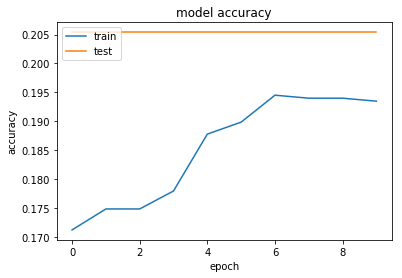

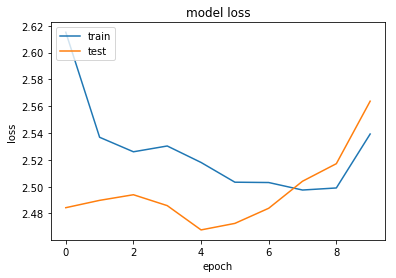

Train on 1933 samples, validate on 482 samples
Epoch 1/20
1933/1933 [==============================] - 116s 60ms/step - loss: 3.0725 - acc: 0.0776 - val_loss: 2.9888 - val_acc: 0.0809
Epoch 2/20
1933/1933 [==============================] - 105s 54ms/step - loss: 2.9908 - acc: 0.0869 - val_loss: 2.9556 - val_acc: 0.0809
Epoch 3/20
1933/1933 [==============================] - 103s 53ms/step - loss: 2.9755 - acc: 0.0879 - val_loss: 2.9286 - val_acc: 0.0913
Epoch 4/20
1933/1933 [==============================] - 104s 54ms/step - loss: 2.9704 - acc: 0.0859 - val_loss: 2.9280 - val_acc: 0.0913
Epoch 5/20
1933/1933 [==============================] - 105s 54ms/step - loss: 2.9559 - acc: 0.0859 - val_loss: 2.9218 - val_acc: 0.0913
Epoch 6/20
1933/1933 [==============================] - 104s 54ms/step - loss: 2.9556 - acc: 0.0812 - val_loss: 2.9219 - val_acc: 0.0913
Epoch 7/20
1933/1933 [==============================] - 104s 54ms/step - loss: 2.9554 - acc: 0.0869 - val_loss: 2.9293 - val_acc: 0

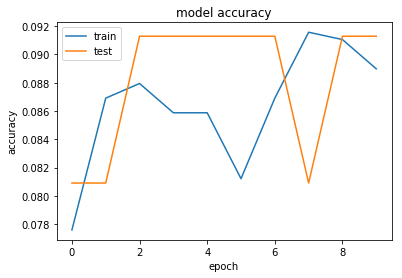

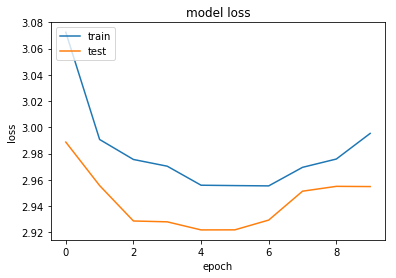

Train on 1933 samples, validate on 482 samples
Epoch 1/20
1933/1933 [==============================] - 117s 60ms/step - loss: 3.2177 - acc: 0.0704 - val_loss: 3.1247 - val_acc: 0.0747
Epoch 2/20
1933/1933 [==============================] - 105s 54ms/step - loss: 3.1349 - acc: 0.0574 - val_loss: 3.1333 - val_acc: 0.0747
Epoch 3/20
1933/1933 [==============================] - 105s 54ms/step - loss: 3.1150 - acc: 0.0657 - val_loss: 3.1348 - val_acc: 0.0747
Epoch 4/20
1933/1933 [==============================] - 105s 55ms/step - loss: 3.1053 - acc: 0.0610 - val_loss: 3.1380 - val_acc: 0.0747
Epoch 5/20
1933/1933 [==============================] - 105s 54ms/step - loss: 3.1135 - acc: 0.0662 - val_loss: 3.1545 - val_acc: 0.0747
Epoch 6/20
1933/1933 [==============================] - 105s 54ms/step - loss: 3.1139 - acc: 0.0673 - val_loss: 3.1032 - val_acc: 0.0747
Epoch 7/20
1933/1933 [==============================] - 104s 54ms/step - loss: 3.1112 - acc: 0.0698 - val_loss: 3.1175 - val_acc: 0

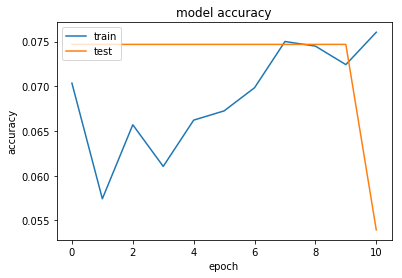

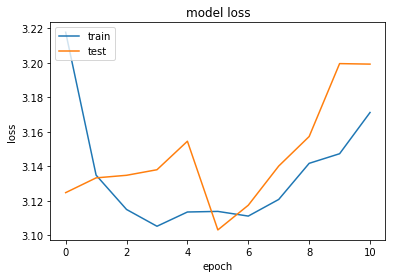

Train on 1933 samples, validate on 482 samples
Epoch 1/20
1933/1933 [==============================] - 120s 62ms/step - loss: 3.2281 - acc: 0.0579 - val_loss: 3.2397 - val_acc: 0.0809
Epoch 2/20
1933/1933 [==============================] - 105s 55ms/step - loss: 3.1317 - acc: 0.0760 - val_loss: 3.1911 - val_acc: 0.0809
Epoch 3/20
1933/1933 [==============================] - 105s 55ms/step - loss: 3.1159 - acc: 0.0647 - val_loss: 3.1811 - val_acc: 0.0456
Epoch 4/20
1933/1933 [==============================] - 105s 54ms/step - loss: 3.1203 - acc: 0.0667 - val_loss: 3.2080 - val_acc: 0.0809
Epoch 5/20
1933/1933 [==============================] - 105s 55ms/step - loss: 3.1145 - acc: 0.0678 - val_loss: 3.2162 - val_acc: 0.0809
Epoch 6/20
1933/1933 [==============================] - 105s 54ms/step - loss: 3.1041 - acc: 0.0729 - val_loss: 3.2233 - val_acc: 0.0809
Epoch 7/20
1933/1933 [==============================] - 105s 54ms/step - loss: 3.1186 - acc: 0.0750 - val_loss: 3.1780 - val_acc: 0

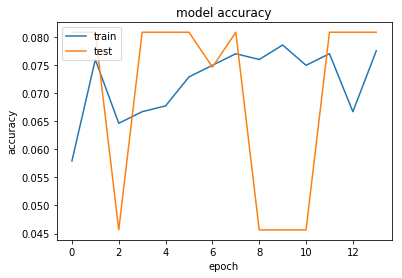

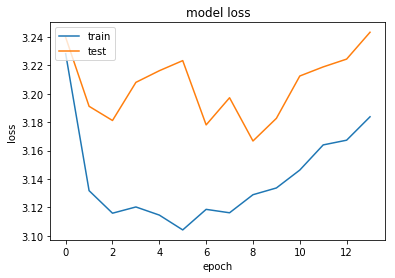

Train on 1933 samples, validate on 482 samples
Epoch 1/20
1933/1933 [==============================] - 120s 62ms/step - loss: 3.1052 - acc: 0.0776 - val_loss: 3.1468 - val_acc: 0.0892
Epoch 2/20
1933/1933 [==============================] - 105s 54ms/step - loss: 3.0117 - acc: 0.0740 - val_loss: 3.0904 - val_acc: 0.0768
Epoch 3/20
1933/1933 [==============================] - 105s 55ms/step - loss: 2.9818 - acc: 0.0709 - val_loss: 3.1042 - val_acc: 0.0892
Epoch 4/20
1933/1933 [==============================] - 105s 54ms/step - loss: 2.9847 - acc: 0.0714 - val_loss: 3.1142 - val_acc: 0.0892
Epoch 5/20
1933/1933 [==============================] - 105s 54ms/step - loss: 2.9910 - acc: 0.0724 - val_loss: 3.0784 - val_acc: 0.0768
Epoch 6/20
1933/1933 [==============================] - 105s 54ms/step - loss: 2.9794 - acc: 0.0843 - val_loss: 3.0566 - val_acc: 0.0768
Epoch 7/20
1933/1933 [==============================] - 105s 54ms/step - loss: 2.9777 - acc: 0.0843 - val_loss: 3.0780 - val_acc: 0

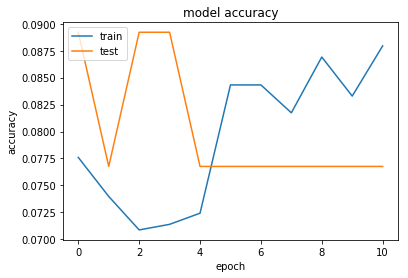

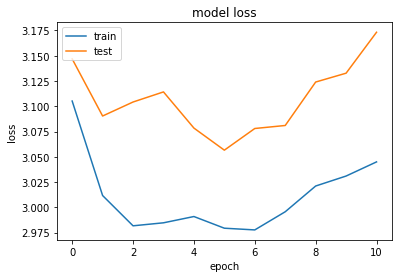

Train on 1933 samples, validate on 482 samples
Epoch 1/20
1933/1933 [==============================] - 121s 63ms/step - loss: 2.6777 - acc: 0.1428 - val_loss: 2.7533 - val_acc: 0.0871
Epoch 2/20
1933/1933 [==============================] - 105s 54ms/step - loss: 2.6140 - acc: 0.1386 - val_loss: 2.7276 - val_acc: 0.0871
Epoch 3/20
1933/1933 [==============================] - 105s 54ms/step - loss: 2.6151 - acc: 0.1464 - val_loss: 2.6582 - val_acc: 0.1494
Epoch 4/20
1933/1933 [==============================] - 106s 55ms/step - loss: 2.5970 - acc: 0.1345 - val_loss: 2.6831 - val_acc: 0.1473
Epoch 5/20
1933/1933 [==============================] - 105s 54ms/step - loss: 2.6109 - acc: 0.1433 - val_loss: 2.7007 - val_acc: 0.1245
Epoch 6/20
1933/1933 [==============================] - 105s 54ms/step - loss: 2.6324 - acc: 0.1469 - val_loss: 2.7595 - val_acc: 0.1494
Epoch 7/20
1933/1933 [==============================] - 106s 55ms/step - loss: 2.6342 - acc: 0.1666 - val_loss: 2.7209 - val_acc: 0

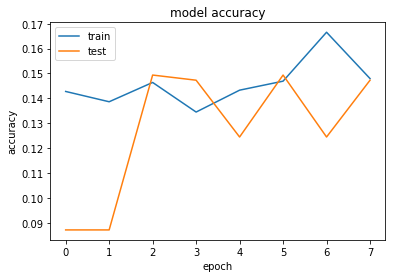

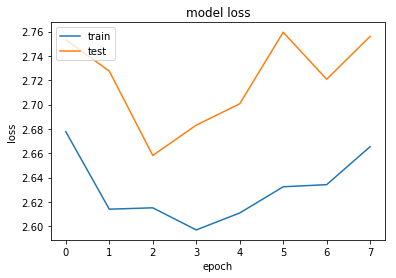

Train on 1933 samples, validate on 482 samples
Epoch 1/20
1933/1933 [==============================] - 123s 64ms/step - loss: 2.9684 - acc: 0.0585 - val_loss: 2.8591 - val_acc: 0.0768
Epoch 2/20
1933/1933 [==============================] - 106s 55ms/step - loss: 2.9034 - acc: 0.0626 - val_loss: 2.8602 - val_acc: 0.0768
Epoch 3/20
1933/1933 [==============================] - 106s 55ms/step - loss: 2.8859 - acc: 0.0786 - val_loss: 2.8487 - val_acc: 0.0768
Epoch 4/20
1933/1933 [==============================] - 106s 55ms/step - loss: 2.8915 - acc: 0.0647 - val_loss: 2.8384 - val_acc: 0.0768
Epoch 5/20
1933/1933 [==============================] - 107s 55ms/step - loss: 2.8853 - acc: 0.0724 - val_loss: 2.8413 - val_acc: 0.0768
Epoch 6/20
1933/1933 [==============================] - 107s 55ms/step - loss: 2.9087 - acc: 0.0673 - val_loss: 2.8162 - val_acc: 0.0768
Epoch 7/20
1933/1933 [==============================] - 106s 55ms/step - loss: 2.8897 - acc: 0.0600 - val_loss: 2.8246 - val_acc: 0

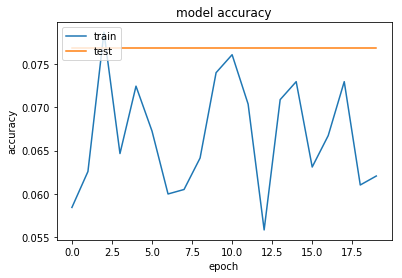

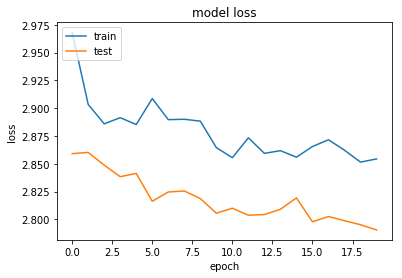

In [18]:
models = ['M1_model.h5', 'M2_model.h5', 'M3_model.h5',
          'M4_model.h5', 'M5_model.h5','M6_model.h5','M7_model.h5']
tdatas = [D_1, D_2, D_3, D_4, D_5, D_6, D_7]

look_back=5
for (model,tdata) in zip(models,tdatas):
  train_model(tdata,model,look_back)

In [0]:
import requests
from bs4 import BeautifulSoup
import xlwt
import time

#获取第一页的内容
def get_one_page(url):
    headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.140 Safari/537.36'
    }
    response = requests.get(url,headers=headers)
    if response.status_code == 200:
        return response.text
    return 

#解析第一页内容，数据结构化
def parse_one_page(html):

    soup = BeautifulSoup(html,'lxml')
    i = 0
    for item in soup.select('tr')[2:-1]:

        yield{
            'time':item.select('td')[i].text,
            'digit_1':item.select('td em')[0].text,
            'digit_2':item.select('td em')[1].text,
            'digit_3':item.select('td em')[2].text,
            'digit_4':item.select('td em')[3].text,
            'digit_5':item.select('td em')[4].text,
            'digit_6':item.select('td em')[5].text,
            'digit_7':item.select('td em')[6].text,
        }

#将数据写入Excel表格中
def create_test_excel(lookback):
    f = xlwt.Workbook()                             
    sheet1 = f.add_sheet('ssq',cell_overwrite_ok=True)
    row0 = ["date","digit_1","digit_2","digit_3","digit_4","digit_5","digit_6","digit_7"]
    #写入第一行
    for j in range(0,len(row0)):
        sheet1.write(0,j,row0[j])

    #依次爬取每一页内容的每一期信息，并将其依次写入Excel
    i=0
    for k in range(1,122):
        if i == lookback + 1:
          break
        url = 'http://kaijiang.zhcw.com/zhcw/html/ssq/list_%s.html' %(str(k))
        html = get_one_page(url)
        
        #写入每一期的信息
        for item in parse_one_page(html):
            sheet1.write(i+1,0,item['time'])
            sheet1.write(i+1,1,item['digit_1'])
            sheet1.write(i+1,2,item['digit_2'])
            sheet1.write(i+1,3,item['digit_3'])
            sheet1.write(i+1,4,item['digit_4'])
            sheet1.write(i+1,5,item['digit_5'])
            sheet1.write(i+1,6,item['digit_6'])
            sheet1.write(i+1,7,item['digit_7'])
            i+=1
    
    f.save('ssq_test.xls')
    print('%d页已保存。'%k)


M1_model.h5


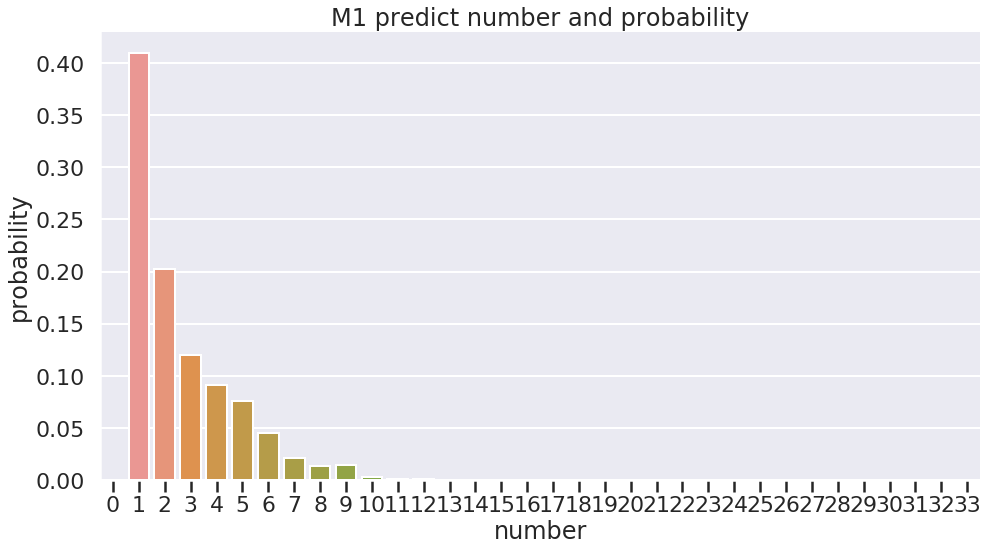

1 : 40.96%
2 : 20.21%
3 : 12.01%
4 : 9.18%
5 : 7.58%
6 : 4.50%
7 : 2.09%
9 : 1.47%
8 : 1.34%
10 : 0.28%
11 : 0.16%
12 : 0.13%
13 : 0.03%
14 : 0.03%
16 : 0.01%
15 : 0.01%
17 : 0.00%
24 : 0.00%
18 : 0.00%
20 : 0.00%
19 : 0.00%
22 : 0.00%
26 : 0.00%
21 : 0.00%
31 : 0.00%
32 : 0.00%
23 : 0.00%
33 : 0.00%
27 : 0.00%
28 : 0.00%
29 : 0.00%
30 : 0.00%
0 : 0.00%


M2_model.h5


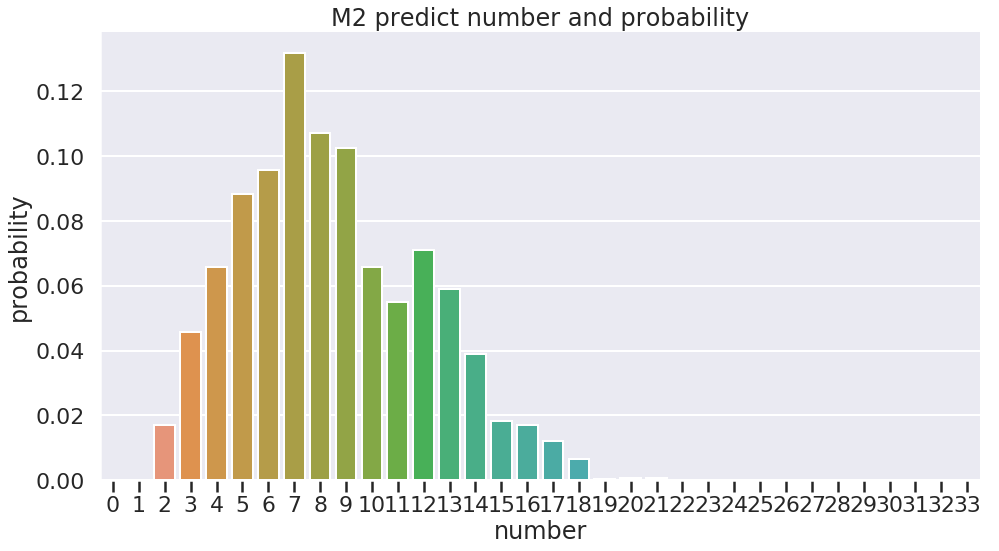

7 : 13.18%
8 : 10.70%
9 : 10.26%
6 : 9.56%
5 : 8.84%
12 : 7.10%
4 : 6.58%
10 : 6.57%
13 : 5.90%
11 : 5.49%
3 : 4.57%
14 : 3.89%
15 : 1.83%
16 : 1.72%
2 : 1.71%
17 : 1.22%
18 : 0.64%
21 : 0.08%
20 : 0.08%
19 : 0.04%
22 : 0.02%
23 : 0.01%
26 : 0.00%
24 : 0.00%
25 : 0.00%
0 : 0.00%
28 : 0.00%
1 : 0.00%
29 : 0.00%
32 : 0.00%
27 : 0.00%
30 : 0.00%
31 : 0.00%


M3_model.h5


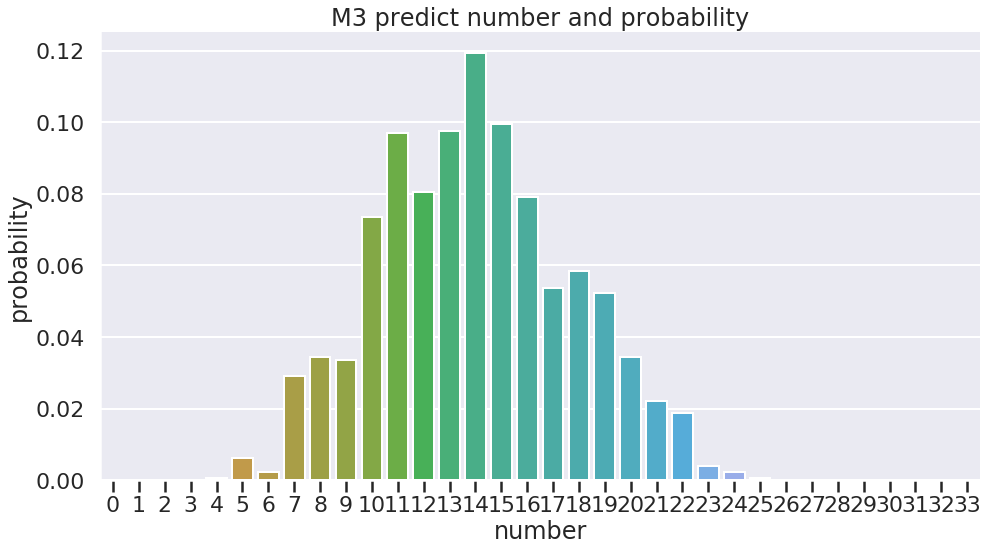

14 : 11.93%
15 : 9.96%
13 : 9.77%
11 : 9.71%
12 : 8.06%
16 : 7.92%
10 : 7.34%
18 : 5.84%
17 : 5.37%
19 : 5.23%
20 : 3.44%
8 : 3.43%
9 : 3.36%
7 : 2.91%
21 : 2.20%
22 : 1.87%
5 : 0.62%
23 : 0.40%
24 : 0.23%
6 : 0.23%
4 : 0.07%
25 : 0.07%
26 : 0.02%
27 : 0.01%
3 : 0.00%
28 : 0.00%
29 : 0.00%
30 : 0.00%
0 : 0.00%
1 : 0.00%
32 : 0.00%
33 : 0.00%
31 : 0.00%


M4_model.h5


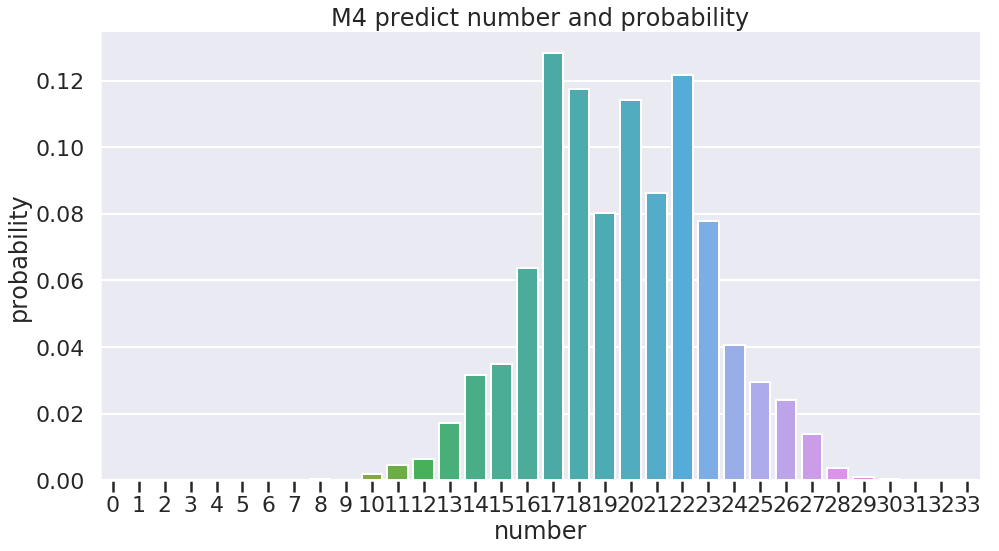

17 : 12.83%
22 : 12.17%
18 : 11.74%
20 : 11.42%
21 : 8.62%
19 : 8.02%
23 : 7.78%
16 : 6.37%
24 : 4.06%
15 : 3.49%
14 : 3.18%
25 : 2.96%
26 : 2.42%
13 : 1.71%
27 : 1.39%
12 : 0.65%
11 : 0.45%
28 : 0.38%
10 : 0.18%
29 : 0.10%
30 : 0.03%
8 : 0.03%
9 : 0.02%
6 : 0.01%
31 : 0.00%
7 : 0.00%
5 : 0.00%
3 : 0.00%
33 : 0.00%
0 : 0.00%
32 : 0.00%
2 : 0.00%
1 : 0.00%


M5_model.h5


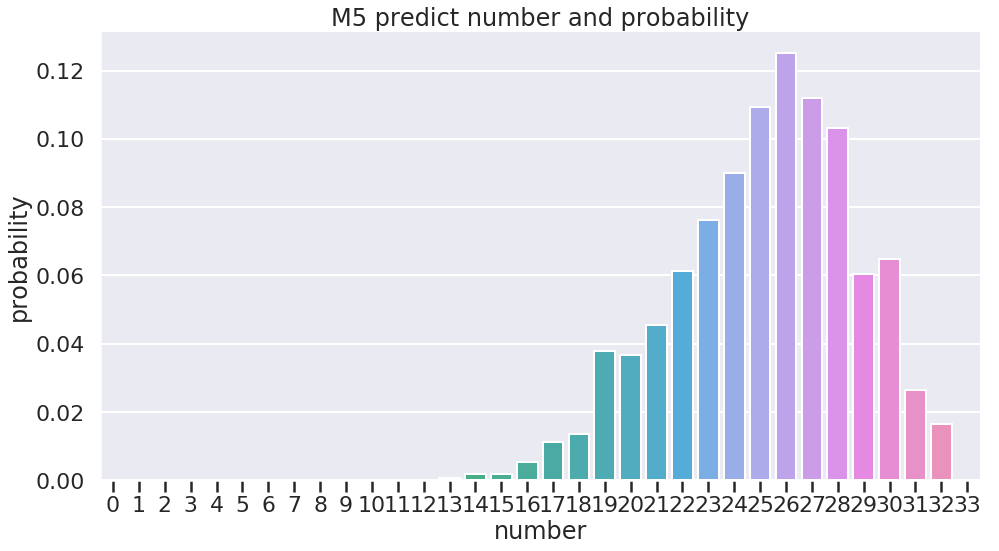

26 : 12.52%
27 : 11.19%
25 : 10.92%
28 : 10.33%
24 : 8.99%
23 : 7.61%
30 : 6.47%
22 : 6.13%
29 : 6.03%
21 : 4.56%
19 : 3.78%
20 : 3.68%
31 : 2.64%
32 : 1.65%
18 : 1.34%
17 : 1.13%
16 : 0.55%
14 : 0.19%
15 : 0.17%
13 : 0.07%
10 : 0.01%
12 : 0.01%
11 : 0.00%
8 : 0.00%
9 : 0.00%
7 : 0.00%
4 : 0.00%
5 : 0.00%
3 : 0.00%
2 : 0.00%
0 : 0.00%
1 : 0.00%
33 : 0.00%


M6_model.h5


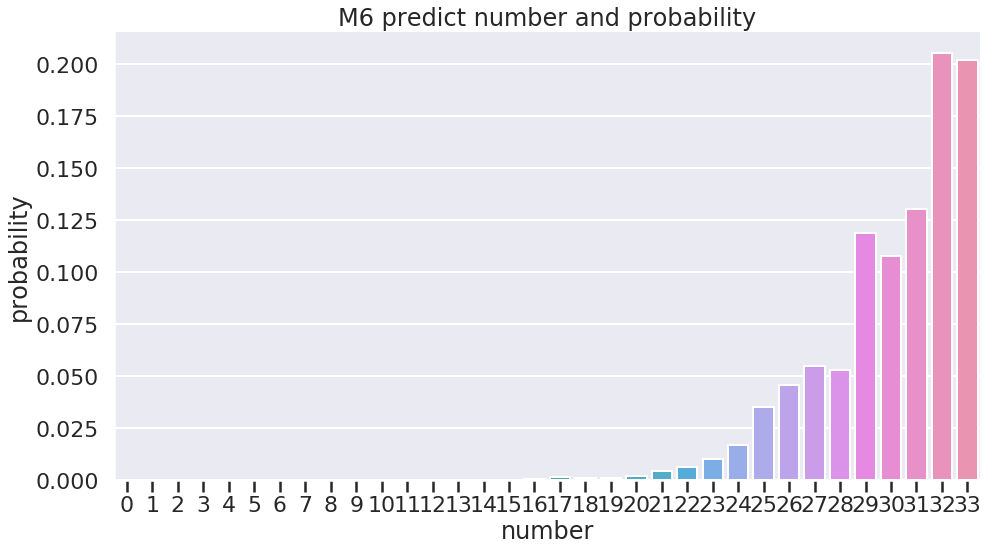

32 : 20.54%
33 : 20.20%
31 : 13.03%
29 : 11.89%
30 : 10.77%
27 : 5.50%
28 : 5.29%
26 : 4.59%
25 : 3.51%
24 : 1.70%
23 : 1.01%
22 : 0.65%
21 : 0.45%
20 : 0.19%
17 : 0.14%
19 : 0.12%
18 : 0.10%
16 : 0.07%
15 : 0.03%
14 : 0.02%
10 : 0.02%
9 : 0.02%
1 : 0.02%
0 : 0.02%
12 : 0.02%
11 : 0.02%
6 : 0.01%
2 : 0.01%
3 : 0.01%
5 : 0.01%
4 : 0.01%
13 : 0.01%
8 : 0.01%


M7_model.h5


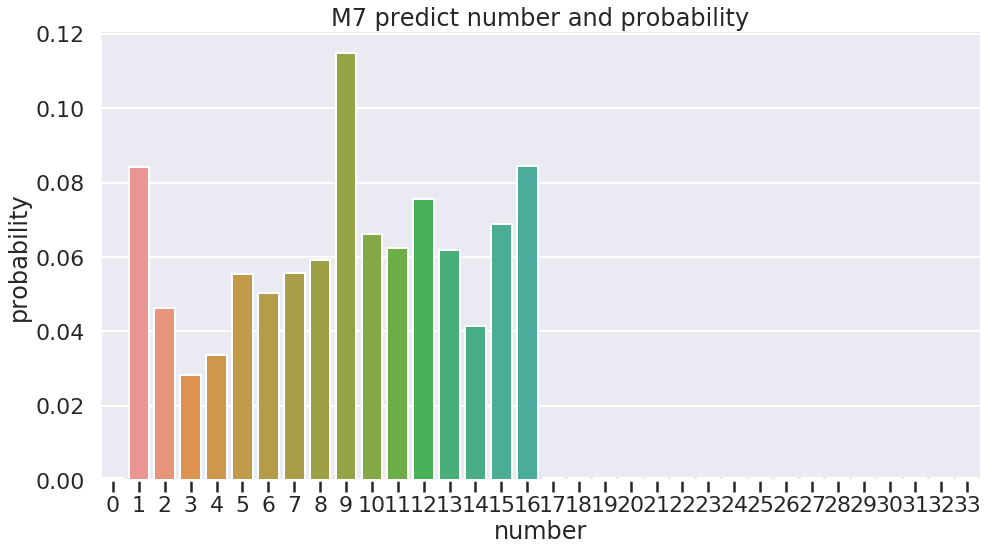

9 : 11.48%
16 : 8.45%
1 : 8.43%
12 : 7.56%
15 : 6.88%
10 : 6.61%
11 : 6.25%
13 : 6.20%
8 : 5.91%
7 : 5.58%
5 : 5.54%
6 : 5.02%
2 : 4.64%
14 : 4.15%
4 : 3.36%
3 : 2.82%
22 : 0.07%
26 : 0.07%
33 : 0.07%
19 : 0.07%
21 : 0.07%
31 : 0.07%
28 : 0.06%
24 : 0.06%
25 : 0.06%
0 : 0.06%
18 : 0.06%
30 : 0.06%
29 : 0.06%
17 : 0.06%
32 : 0.06%
23 : 0.06%
20 : 0.05%




In [21]:
from keras.models import load_model
from keras.utils import to_categorical
import seaborn as sns
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import xlwt
import time
import seaborn as sns
import matplotlib.pyplot as plt

look_back=4

#获取第一页的内容
def get_one_page(url):
    headers = {
        'User-Agent':'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.140 Safari/537.36'
    }
    response = requests.get(url,headers=headers)
    if response.status_code == 200:
        return response.text
    return 

#解析第一页内容，数据结构化
def parse_one_page(html):

    soup = BeautifulSoup(html,'lxml')
    i = 0
    for item in soup.select('tr')[2:-1]:

        yield{
            'time':item.select('td')[i].text,
            'digit_1':item.select('td em')[0].text,
            'digit_2':item.select('td em')[1].text,
            'digit_3':item.select('td em')[2].text,
            'digit_4':item.select('td em')[3].text,
            'digit_5':item.select('td em')[4].text,
            'digit_6':item.select('td em')[5].text,
            'digit_7':item.select('td em')[6].text,
        }

def create_test_excel(look_back):
    f = xlwt.Workbook()                             
    sheet1 = f.add_sheet('ssq',cell_overwrite_ok=True)
    row0 = ["date","digit_1","digit_2","digit_3","digit_4","digit_5","digit_6","digit_7"]
    #写入第一行
    for j in range(0,len(row0)):
        sheet1.write(0,j,row0[j])

    #依次爬取每一页内容的每一期信息，并将其依次写入Excel
    i=0
    url = 'http://kaijiang.zhcw.com/zhcw/html/ssq/list_1.html' 
    html = get_one_page(url)
        
        #写入每一期的信息
    for item in parse_one_page(html):
      
      sheet1.write(i+1,0,item['time'])
      sheet1.write(i+1,1,item['digit_1'])
      sheet1.write(i+1,2,item['digit_2'])
      sheet1.write(i+1,3,item['digit_3'])
      sheet1.write(i+1,4,item['digit_4'])
      sheet1.write(i+1,5,item['digit_5'])
      sheet1.write(i+1,6,item['digit_6'])
      sheet1.write(i+1,7,item['digit_7'])
      i+=1
            
      if i == look_back + 1:
        break
    
    f.save('ssq_test.xls')

create_test_excel(look_back)
data = pd.read_excel('ssq_test.xls')
data['date'] = pd.to_datetime(data['date'])
data = data.sort_values(by = 'date')
data.reset_index(inplace=True)
del data['index']
del data['date']

D_1 = data['digit_1']
D_2 = data['digit_2']
D_3 = data['digit_3']
D_4 = data['digit_4']
D_5 = data['digit_5']
D_6 = data['digit_6']
D_7 = data['digit_7']

models = ['M1_model.h5', 'M2_model.h5', 'M3_model.h5', 'M4_model.h5', 'M5_model.h5','M6_model.h5','M7_model.h5']
tdatas = [D_1,D_2,D_3,D_4,D_5,D_6,D_7]


for (model,tdata) in zip(models,tdatas):
    
    print(model)
    M_ssq = load_model(model)

    test_X = to_categorical(np.asarray([tdata[-look_back:]]),num_classes=34)

    pred = M_ssq.predict(test_X)
    ranks = np.argsort(pred[0])
    
    
    dfp = pd.DataFrame(pred)
    dfplot = pd.DataFrame()
    dfplot['probability'] = dfp.T[0]
    dfplot['number'] = dfplot.index
    
    sns.set_context("poster")
    sns.set_style("darkgrid",{'xtick.bottom': True})
    sns.catplot(x='number',y='probability', kind="bar", height=8, aspect=1.8, data=dfplot)
    plt.title(model[:2] + ' predict number and probability')
    plt.ylabel('probability')
    plt.xlabel('number')
    plt.show()
    
    for i in range(1,34):
        print(str(ranks[-i]) + ' : %.2f%%' %(pred[0][ranks[-i]]*100))
    print('\n')